<a href="https://colab.research.google.com/github/kanaka-22/CMP304-AI-Human-Emotion-Recognition/blob/master/IrisdatasetMLPgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 80 samples, validate on 40 samples
Epoch 1/25
80/80 [==============================] - 0s 2ms/step - loss: 1.4243 - accuracy: 0.2625 - val_loss: 1.0752 - val_accuracy: 0.3750
Epoch 2/25
80/80 [==============================] - 0s 234us/step - loss: 1.2385 - accuracy: 0.2625 - val_loss: 1.0530 - val_accuracy: 0.3750
Epoch 3/25
80/80 [==============================] - 0s 223us/step - loss: 1.1057 - accuracy: 0.2625 - val_loss: 1.0438 - val_accuracy: 0.3750
Epoch 4/25
80/80 [==============================] - 0s 221us/step - loss: 1.0038 - accuracy: 0.3000 - val_loss: 1.0421 - val_accuracy: 0.4000
Epoch 5/25
80/80 [==============================] - 0s 222us/step - loss: 0.9331 - accuracy: 0.4750 - val_loss: 1.0479 - val_accuracy: 0.1500
Epoch 6/25
80/80 [==============================] - 0s 252us/step - loss: 0.8923 - accuracy: 0.4500 - val_loss: 1.0561 - val_accuracy: 0.1500
Epoch 7/25
80/80 [==============================] - 0s 230us/step - loss: 0.8663 - accuracy: 0.4500 - val_

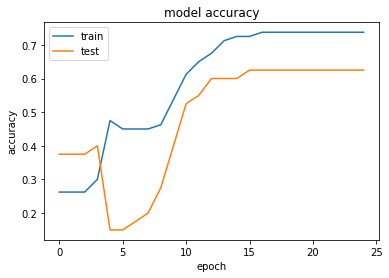

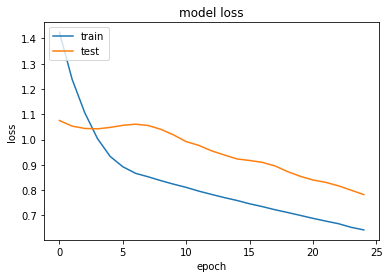

30/30 [==============================] - 0s 169us/step

Accuracy: 53.33%


In [120]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy
import pandas as pd
numpy.random.seed(7)
COLUMN_NAMES = [
        'SepalLength', 
        'SepalWidth',
        'PetalLength', 
        'PetalWidth', 
        'Species'
        ]
#Load the train Data in 'x' and 'y' variables
training_dataset = pd.read_csv('/content/sample_data/iris_training.csv', names=COLUMN_NAMES, header=0)
train_x = training_dataset.iloc[:, 0:4].values
train_y = training_dataset.iloc[:, 4].values
encoding_train_y = np_utils.to_categorical(train_y)
#Load the test Data in 'x' and 'y' variables
test_dataset = pd.read_csv('/content/sample_data/iris_test.csv', names=COLUMN_NAMES, header=0)
test_x = test_dataset.iloc[:, 0:4].values
test_y = test_dataset.iloc[:, 4].values
encoding_test_y = np_utils.to_categorical(test_y)
#create the model 
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Fit the model
history=model.fit(train_x, encoding_train_y, epochs=25, batch_size=10,validation_split=0.33)
#All data in history
print(history.history.keys())
#History for accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
# History for loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
scores = model.evaluate(test_x, encoding_test_y)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

